#         Hajar Elbehairy

# Telco Customer Churn

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
##importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# calling the data set
df = pd .read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
df.shape 

(7043, 21)

In [4]:
df.size

147903

# why do you check for data size ?
because  if data size are big we need to run this project on onother server ex: colab or kaggle 

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4006,2607-DHDAK,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,No
6631,2108-GLPQB,Male,0,Yes,No,25,Yes,Yes,DSL,No,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),55.55,1405.3,No
3466,9430-NKQLY,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1790.8,No
1225,6581-NQCBA,Female,0,Yes,No,16,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,49.95,810.2,Yes
4753,5729-KLZAR,Female,0,Yes,Yes,4,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.85,302.75,Yes


In [8]:
# Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# is there null values
all rows are equal ,thereis no null value

In [9]:
# checking null values
df.isnull().sum().sum()

0

In [10]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
Categorical=df.select_dtypes(include='object').columns.tolist()
Categorical

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()
Numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [13]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,69.000000,72.000000,72.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,102.600000,107.400000,114.729000,118.750000


# what is probability distribution?

SeniorCitizen==>mean>median==>Right-Skewed

/tmp/ipykernel_27/964379236.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['SeniorCitizen'], shade=True, bw=0.5, color="olive")
/tmp/ipykernel_27/964379236.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SeniorCitizen'], shade=True, bw=0.5, color="olive")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


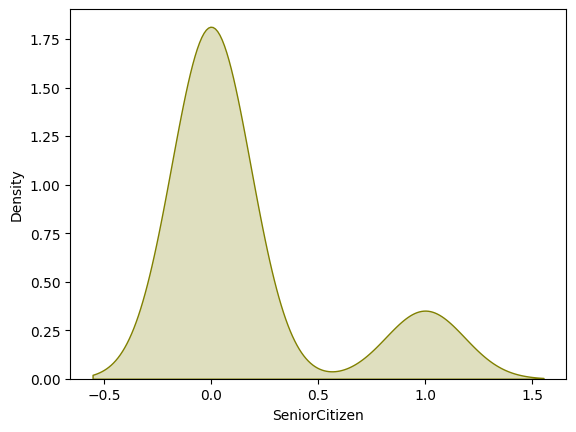

In [14]:
sns.kdeplot(df['SeniorCitizen'], shade=True, bw=0.5, color="olive")
plt.show()

# there is outlier in this feature

tenure==>mean>median==>Right-Skewed

/tmp/ipykernel_27/1280707480.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['tenure'], shade=True, bw=0.5, color="olive")
/tmp/ipykernel_27/1280707480.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tenure'], shade=True, bw=0.5, color="olive")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


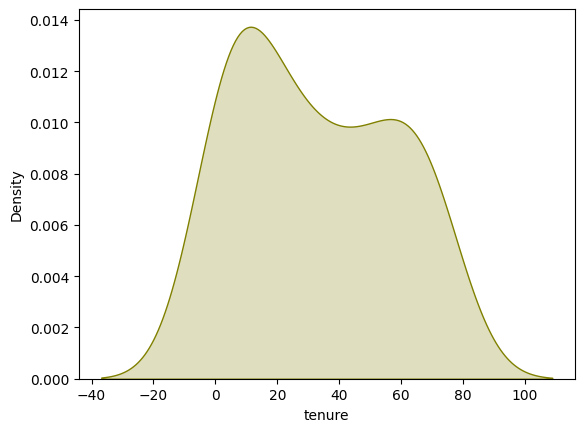

In [15]:
sns.kdeplot(df['tenure'], shade=True, bw=0.5, color="olive")
plt.show()

#### MonthlyCharges==>mean<median==>left-Skewed

/tmp/ipykernel_27/1211663192.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['MonthlyCharges'], shade=True, bw=0.5, color="olive")
/tmp/ipykernel_27/1211663192.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['MonthlyCharges'], shade=True, bw=0.5, color="olive")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


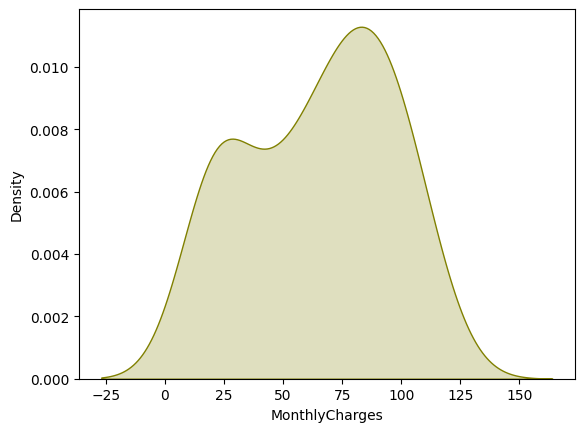

In [16]:
sns.kdeplot(df['MonthlyCharges'], shade=True, bw=0.5, color="olive")
plt.show()

In [17]:
df.describe(include = "object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [18]:
unique_values=[None]*len(df)
for i, p in enumerate(df):
    unique_values[i]= len(df[p].unique())
    print('unique_values',p," =", unique_values[i])

unique_values customerID  = 7043
unique_values gender  = 2
unique_values SeniorCitizen  = 2
unique_values Partner  = 2
unique_values Dependents  = 2
unique_values tenure  = 73
unique_values PhoneService  = 2
unique_values MultipleLines  = 3
unique_values InternetService  = 3
unique_values OnlineSecurity  = 3
unique_values OnlineBackup  = 3
unique_values DeviceProtection  = 3
unique_values TechSupport  = 3
unique_values StreamingTV  = 3
unique_values StreamingMovies  = 3
unique_values Contract  = 3
unique_values PaperlessBilling  = 2
unique_values PaymentMethod  = 4
unique_values MonthlyCharges  = 1585
unique_values TotalCharges  = 6531
unique_values Churn  = 2


# visualization

In [19]:
value_count_dict = dict()
for i in Categorical :
    print(i,'column\'s count values : ' )
    index , count = df[i].value_counts().index , df[i].value_counts().values
    value_count_dict['value']  = list(index)
    value_count_dict['count'] = list(count)
    value_count_df = pd.DataFrame(value_count_dict)
    if value_count_df.shape[0]>10:
        display(value_count_df.head(10))
    else :
        display(value_count_df.head())

customerID column's count values : 


,value,count
0,3186-AJIEK,1
1,7590-VHVEG,1
2,5575-GNVDE,1
3,4501-VCPFK,1
4,6075-SLNIL,1
5,9347-AERRL,1
6,0093-XWZFY,1
7,2274-XUATA,1
8,1980-KXVPM,1
9,7703-ZEKEF,1


gender column's count values : 


,value,count
0,Male,3555
1,Female,3488


Partner column's count values : 


,value,count
0,No,3641
1,Yes,3402


Dependents column's count values : 


,value,count
0,No,4933
1,Yes,2110


PhoneService column's count values : 


,value,count
0,Yes,6361
1,No,682


MultipleLines column's count values : 


,value,count
0,No,3390
1,Yes,2971
2,No phone service,682


InternetService column's count values : 


,value,count
0,Fiber optic,3096
1,DSL,2421
2,No,1526


OnlineSecurity column's count values : 


,value,count
0,No,3498
1,Yes,2019
2,No internet service,1526


OnlineBackup column's count values : 


,value,count
0,No,3088
1,Yes,2429
2,No internet service,1526


DeviceProtection column's count values : 


,value,count
0,No,3095
1,Yes,2422
2,No internet service,1526


TechSupport column's count values : 


,value,count
0,No,3473
1,Yes,2044
2,No internet service,1526


StreamingTV column's count values : 


,value,count
0,No,2810
1,Yes,2707
2,No internet service,1526


StreamingMovies column's count values : 


,value,count
0,No,2785
1,Yes,2732
2,No internet service,1526


Contract column's count values : 


,value,count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


PaperlessBilling column's count values : 


,value,count
0,Yes,4171
1,No,2872


PaymentMethod column's count values : 


,value,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


TotalCharges column's count values : 


,value,count
0,,11
1,20.2,11
2,19.75,9
3,20.05,8
4,19.9,8
5,19.65,8
6,19.55,7
7,45.3,7
8,20.15,6
9,20.25,6


Churn column's count values : 


,value,count
0,No,5174
1,Yes,1869


In [20]:
# lst = list(df.select_dtypes('object').columns)

 

# for i in lst :

#   lb = LabelEncoder()

#   df[i] = lb.fit_transform(df[i])

In [21]:
# sns.heatmap(df.corr(),annot = True , cmap = "Greens")

In [22]:
data=df.loc[: , ['gender', 'SeniorCitizen', 'Partner' ,'Dependents', 'PhoneService',"Churn","PaperlessBilling" ] ]
data

,gender,SeniorCitizen,Partner,Dependents,PhoneService,Churn,PaperlessBilling
0,Female,0,Yes,No,No,No,Yes
1,Male,0,No,No,Yes,No,No
2,Male,0,No,No,Yes,Yes,Yes
3,Male,0,No,No,No,No,No
4,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,No,Yes
7039,Female,0,Yes,Yes,Yes,No,Yes
7040,Female,0,Yes,Yes,No,No,Yes
7041,Male,1,Yes,No,Yes,Yes,Yes


In [23]:
fig = make_subplots(
    rows=4, cols=2, subplot_titles=('gender', 'SeniorCitizen', 'Partner' ,'Dependents', 'PhoneService',"Churn","PaperlessBilling"),
      specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           ])


colours = ['#4285f4', '#ea4335', '#fbbc05']


fig.add_trace(go.Pie(labels=np.array(df['gender'].value_counts().index),
                     values=[x for x in df['gender'].value_counts()],
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['SeniorCitizen'].value_counts().index),
                     values=[x for x in df['SeniorCitizen'].value_counts()], 
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Dependents'].value_counts().index),
                     values=[x for x in df['Dependents'].value_counts()], 
                     textinfo='label+percent',  marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Partner'].value_counts().index),
                     values=[x for x in df['Partner'].value_counts()], 
                     textinfo='label+percent', marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['PhoneService'].value_counts().index),
                     values=[x for x in df['PhoneService'].value_counts()], 
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Churn'].value_counts().index),
                     values=[x for x in df['Churn'].value_counts()], 
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)
fig.add_trace(go.Pie(labels=np.array(df['PaperlessBilling'].value_counts().index),
                     values=[x for x in df['PaperlessBilling'].value_counts()], 
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=1)

fig.update_layout(height=1500, font=dict(size=14), showlegend=False)

fig.show()

In [24]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [25]:
df['gender'].value_counts(normalize = True)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

the ration between male and female are enough equal

([<matplotlib.axis.XTick at 0x790a3efb9ff0>,
 [Text(0, 0, 'churn'), Text(1, 0, 'not churn')])

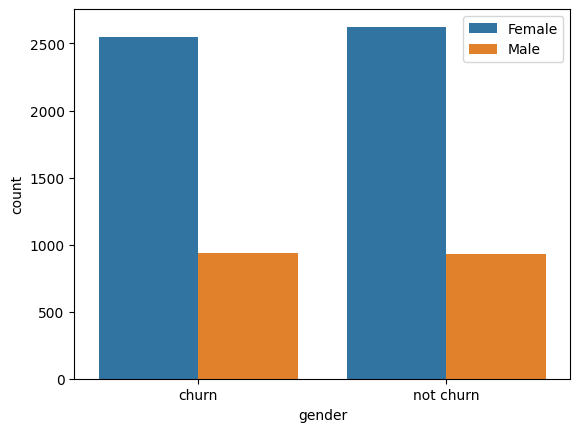

In [26]:
sns.countplot(x=df["gender"],hue='Churn',data=df)
plt.legend(labels=['Female','Male'])
plt.xticks([0,1],["churn","not churn"])

In [27]:
df['Partner'].value_counts(normalize = True)

Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

the ratio between partner I think is almost equal but hasnot partener is more 

([<matplotlib.axis.XTick at 0x790a3e91ce50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

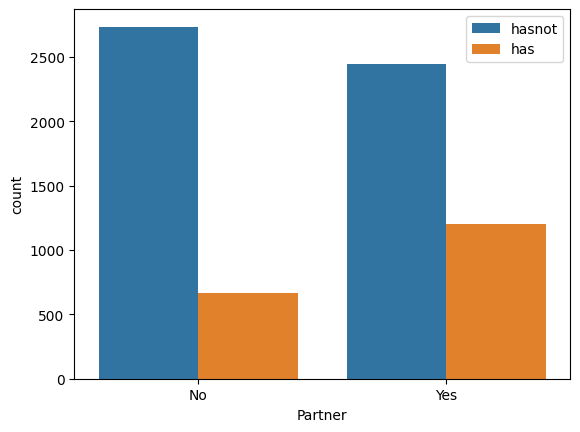

In [28]:
sns.countplot(x=df["Partner"],hue='Churn',data=df)
plt.legend(labels=["hasnot","has"])
plt.xticks([0,1],['No','Yes'])

In [29]:
df["SeniorCitizen"].value_counts(normalize=True)

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

junior is more than senior

([<matplotlib.axis.XTick at 0x790a4926f6a0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

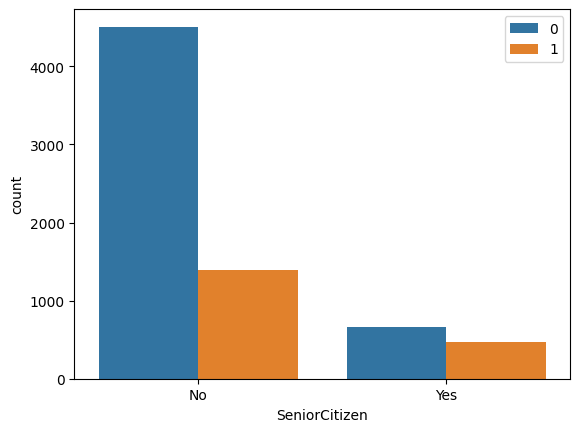

In [30]:
sns.countplot(x=df["SeniorCitizen"],hue='Churn',data=df)
plt.legend(labels=["0","1"])
plt.xticks([0,1],['No','Yes'])

In [31]:
df["Partner"].value_counts(normalize=True)

Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

([<matplotlib.axis.XTick at 0x790a3e960f40>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

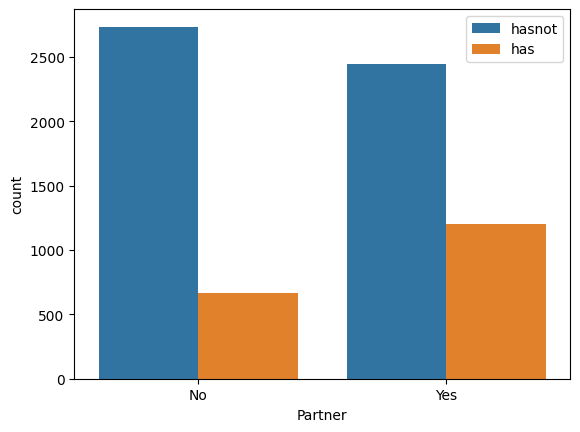

In [32]:
sns.countplot(x=df["Partner"],hue='Churn',data=df)
plt.legend(labels=["hasnot","has"])
plt.xticks([0,1],['No','Yes'])

# most of people have partener church

In [33]:
df["MultipleLines"].value_counts(normalize=True)

MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

hasnot multiple line is more than has multiple line

([<matplotlib.axis.XTick at 0x790a3e9c28c0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

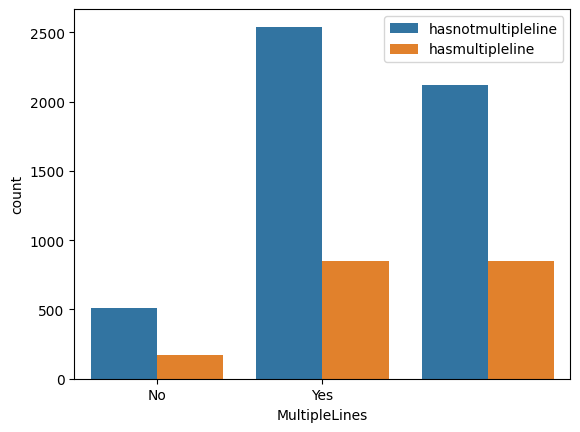

In [34]:
sns.countplot(x=df["MultipleLines"],hue='Churn',data=df)
plt.legend(labels=["hasnotmultipleline","hasmultipleline"])
plt.xticks([0,1],['No','Yes'])

In [35]:
df["PaymentMethod"].value_counts(normalize=True)

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

<Figure size 1500x1200 with 0 Axes>

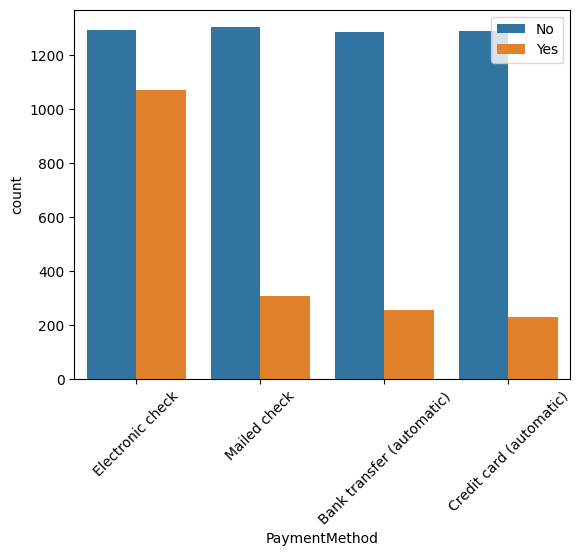

<Figure size 1500x1200 with 0 Axes>

In [36]:
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.legend(labels=['No','Yes'])
plt.xticks(rotation=45)
plt.figure(figsize=(15,12))

# Electronic check  all most not churn

In [37]:
df.groupby(df['PaymentMethod'] == "Electronic check")[['Dependents']].value_counts()

PaymentMethod  Dependents
False          No            3047
               Yes           1631
True           No            1886
               Yes            479
Name: count, dtype: int64

<Axes: xlabel='PaymentMethod,Dependents'>

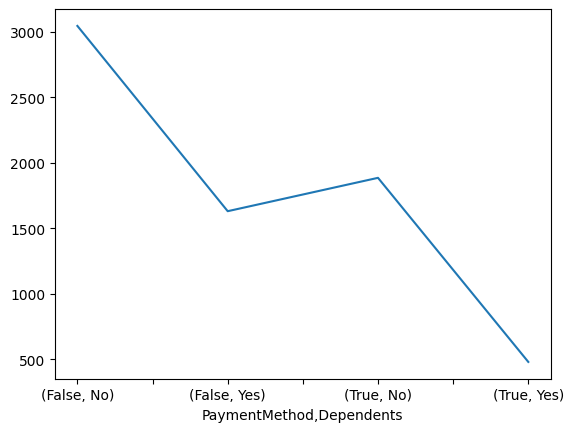

In [38]:
df.groupby(df['PaymentMethod'] == "Electronic check")[['Dependents']].value_counts().plot()

In [39]:
df["tenure"].value_counts().sort_values()

tenure
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 73, dtype: int64

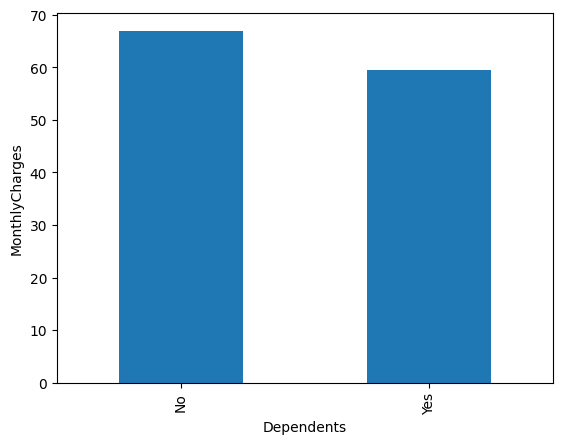

In [40]:
df.groupby('Dependents')['MonthlyCharges'].mean().plot(kind='bar')
plt.xlabel('Dependents')
plt.ylabel('MonthlyCharges')
plt.show()

In [41]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [42]:
df['Contract'].replace("Month-to-month" , 0 ,inplace=True)
df['Contract'].replace("Two year" , 1 ,inplace=True)
df['Contract'].replace("One year" , 2 ,inplace=True)


/tmp/ipykernel_27/3931822809.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_27/3931822809.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [43]:
df[(df['Contract'] == 0) & (df['MonthlyCharges'] >107.400000 )]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
93,6067-NGCEU,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,0,Yes,Credit card (automatic),111.05,7107,No
197,6168-YBYNP,Male,0,No,No,59,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,0,Yes,Electronic check,111.35,6519.75,No
396,0177-PXBAT,Male,1,Yes,No,33,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,0,Yes,Bank transfer (automatic),109.90,3694.7,No
440,0771-WLCLA,Female,0,Yes,Yes,16,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,0,Yes,Electronic check,112.95,1882.55,No
574,6030-REHUX,Female,1,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,0,Yes,Electronic check,110.85,3204.4,No
630,5099-BAILX,Male,1,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,0,Yes,Bank transfer (automatic),110.75,4687.9,Yes
678,5760-IFJOZ,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,0,No,Mailed check,107.95,313.6,No
818,0115-TFERT,Male,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,0,Yes,Electronic check,111.20,2317.1,Yes
880,9851-KIELU,Male,0,No,No,10,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,0,Yes,Electronic check,110.10,1043.3,Yes
1077,4361-BKAXE,Female,0,No,No,41,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,0,Yes,Bank transfer (automatic),114.50,4527.45,Yes


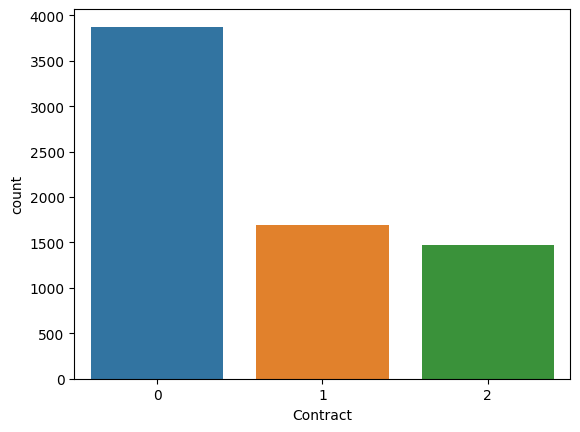

In [44]:
sns.countplot(x='Contract',data=df)
plt.xticks([0,1,2],['0','1','2'])
plt.show()

# The contract term of the customer Month-to-month  is most

In [45]:
df["OnlineSecurity"].value_counts(normalize=True)

OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64

<Figure size 1500x1200 with 0 Axes>

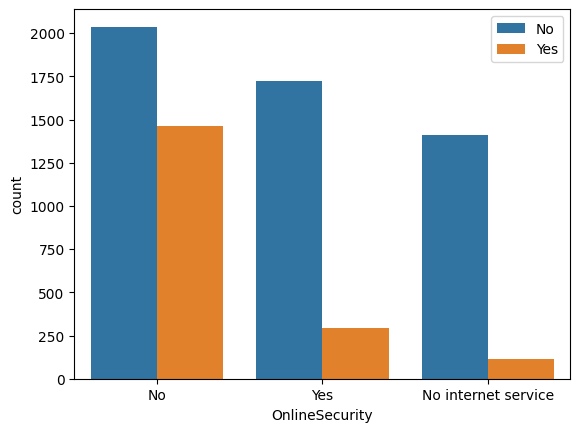

<Figure size 1500x1200 with 0 Axes>

In [46]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)
plt.legend(labels=['No','Yes','No internet service'])
plt.figure(figsize=(15,12))

# becuase there is almost  NO OnlineSecurity  is Churn

<Figure size 1500x1200 with 0 Axes>

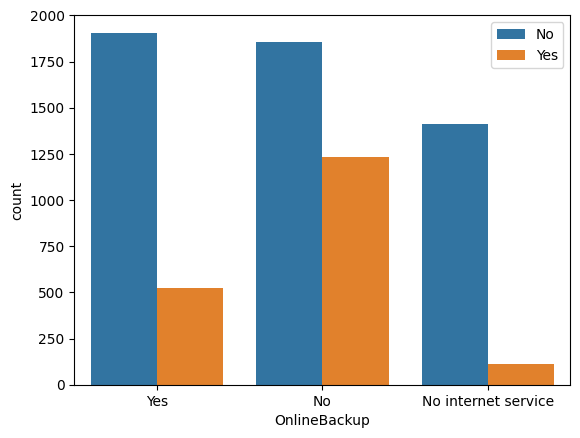

<Figure size 1500x1200 with 0 Axes>

In [47]:
sns.countplot(x='OnlineBackup',hue='Churn',data=df)
plt.legend(labels=['No','Yes'])
plt.figure(figsize=(15,12))

# becuase there is almost NO OnlineBackup is Churn

In [48]:
df["TotalCharges"].value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
130.15      1
3211.9      1
7843.55     1
2196.3      1
197.4       1
Name: count, Length: 6531, dtype: int64

In [49]:
df['InternetService'].value_counts(normalize=True)

InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

<Figure size 1500x1200 with 0 Axes>

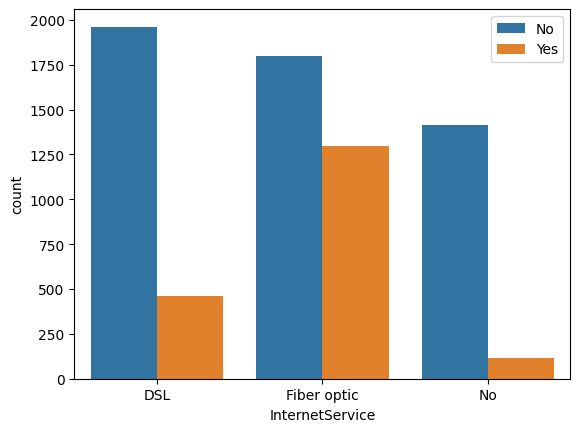

<Figure size 1500x1200 with 0 Axes>

In [50]:
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.legend(labels=['No','Yes'])
plt.figure(figsize=(15,12))

In [51]:
df['Dependents'].replace("No" , 0 , inplace = True)
df['Dependents'].replace("Yes" , 1 , inplace = True)

/tmp/ipykernel_27/441167439.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_27/441167439.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[co

In [52]:
# sns.heatmap(df.corr(),annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

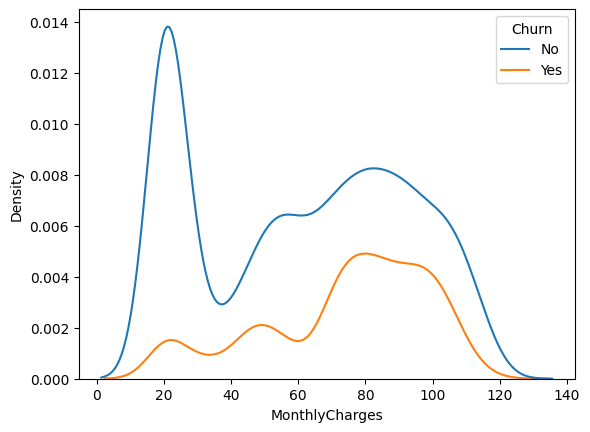

In [53]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn")

church people who is charge monthly with simple amount

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='MonthlyCharges', ylabel='Density'>

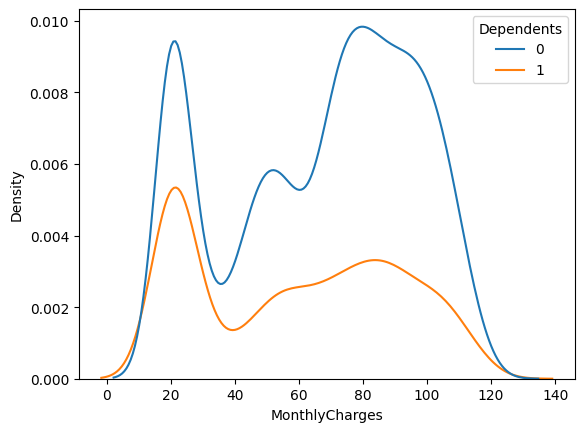

In [54]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Dependents")

people who hasnot children hasnot churh

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='MonthlyCharges', ylabel='Density'>

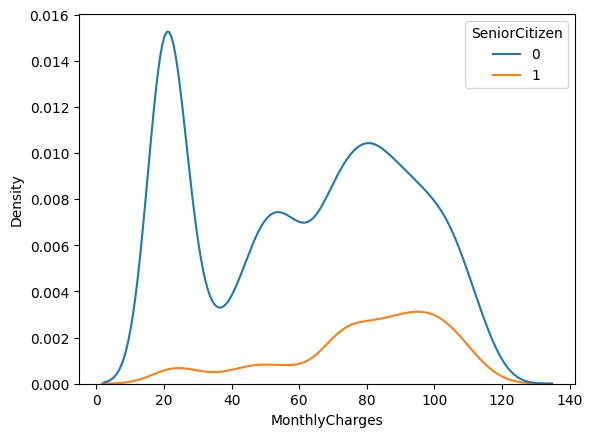

In [55]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="SeniorCitizen")

junoir charge big amount 

In [56]:
df['StreamingMovies'].value_counts(normalize=True)

StreamingMovies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64

In [57]:
df['StreamingTV'].value_counts(normalize=True)

StreamingTV
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64

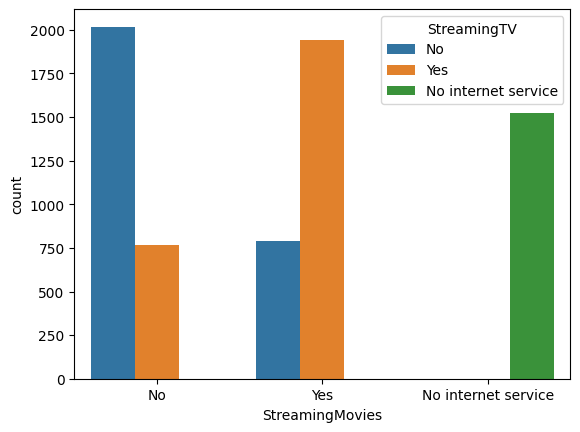

In [58]:
sns.countplot(x='StreamingMovies',hue='StreamingTV',data=df)
plt.show()

In [59]:
churned_customers = df[df['Churn'] == 'Yes']
total_customers = len(df)

# Calculate churn rate
churn_rate = (len(churned_customers) / total_customers) * 100

# Print the churn rate
print("Churn Rate: {:.2f}%".format(churn_rate))

Churn Rate: 26.54%


In [60]:
df['TotalCharges'].dtypes

dtype('O')

In [61]:
df.groupby(['MonthlyCharges' , "TotalCharges"]).head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,0,1,No,No phone service,DSL,No,...,No,No,No,No,0,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,2,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,0,2,Yes,No,DSL,Yes,...,No,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,2,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,2,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,1,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,2,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,1,11,No,No phone service,DSL,Yes,...,No,No,No,No,0,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,0,Yes,Mailed check,74.40,306.6,Yes


In [62]:
df.groupby(['MonthlyCharges' , "TotalCharges"]).head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,0,1,No,No phone service,DSL,No,...,No,No,No,No,0,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,2,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,0,2,Yes,No,DSL,Yes,...,No,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,2,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,2,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,1,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,2,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,1,11,No,No phone service,DSL,Yes,...,No,No,No,No,0,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,0,Yes,Mailed check,74.40,306.6,Yes


In [63]:
import plotly.express as px
fig = px.scatter(df, x="MonthlyCharges", y="TotalCharges", color="Churn")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



most of people charge monthly {20} 
most of churn peoople whith big amount total charge

In [64]:
df["MonthlyCharges"].mean()

64.76169246059918

In [65]:
df["MonthlyCharges"].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.90     44
19.95     44
19.70     43
          ..
42.40      1
97.90      1
116.40     1
31.65      1
39.05      1
Name: count, Length: 1585, dtype: int64

In [66]:
df["MonthlyCharges"].describe(percentiles=[.25,.5,.75,.90,.95,.99])[1:]

mean     64.761692
std      30.090047
min      18.250000
25%      35.500000
50%      70.350000
75%      89.850000
90%     102.600000
95%     107.400000
99%     114.729000
max     118.750000
Name: MonthlyCharges, dtype: float64

In [67]:
def offer(row):
    if row["MonthlyCharges"]>=89.85:
        return("get 300 mgpt for free")
    elif row["MonthlyCharges"]<89.85 and row["MonthlyCharges"]>=70.35:
        return(" get 200 mgpt for free")
    elif row["MonthlyCharges"]<70.35 and row["MonthlyCharges"]>=35.5:
        return("get 100 mgpt for free")
    else :
        return("sorry no offer")

In [68]:
df['offer'] = df.apply(offer , axis = 1)

In [69]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,offer
0,7590-VHVEG,Female,0,Yes,0,1,No,No phone service,DSL,No,...,No,No,No,0,Yes,Electronic check,29.85,29.85,No,sorry no offer
1,5575-GNVDE,Male,0,No,0,34,Yes,No,DSL,Yes,...,No,No,No,2,No,Mailed check,56.95,1889.5,No,get 100 mgpt for free
2,3668-QPYBK,Male,0,No,0,2,Yes,No,DSL,Yes,...,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes,get 100 mgpt for free
3,7795-CFOCW,Male,0,No,0,45,No,No phone service,DSL,Yes,...,Yes,No,No,2,No,Bank transfer (automatic),42.30,1840.75,No,get 100 mgpt for free
4,9237-HQITU,Female,0,No,0,2,Yes,No,Fiber optic,No,...,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes,get 200 mgpt for free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,2,Yes,Mailed check,84.80,1990.5,No,get 200 mgpt for free
7039,2234-XADUH,Female,0,Yes,1,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,2,Yes,Credit card (automatic),103.20,7362.9,No,get 300 mgpt for free
7040,4801-JZAZL,Female,0,Yes,1,11,No,No phone service,DSL,Yes,...,No,No,No,0,Yes,Electronic check,29.60,346.45,No,sorry no offer
7041,8361-LTMKD,Male,1,Yes,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Mailed check,74.40,306.6,Yes,get 200 mgpt for free


<Axes: ylabel='count'>

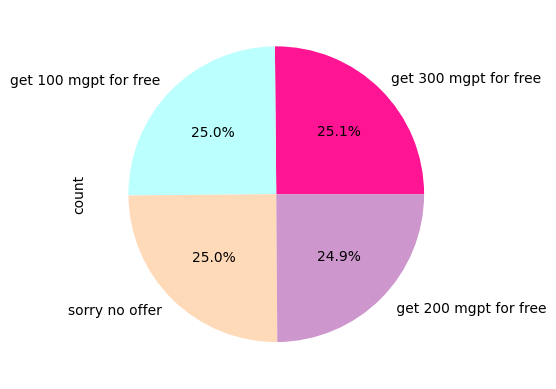

In [70]:
round(df['offer'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%",
                                                            colors = ["#FF1493" , "#BBFFFF" , '#FFDAB9' , '#CD96CD' , '#8E388E'] )

In [71]:
fig.add_trace(go.Pie(labels=np.array(df['offer'].value_counts().index),
                     values=[x for x in df['offer'].value_counts()],
                     textinfo='label+percent', marker_colors=['#4285f4', '#ea4335', '#fbbc05', '#34a853','#ff9933',"#660099"]
))

# Data Cleaning

In [72]:
df.drop("customerID", axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,offer
0,Female,0,Yes,0,1,No,No phone service,DSL,No,Yes,...,No,No,No,0,Yes,Electronic check,29.85,29.85,No,sorry no offer
1,Male,0,No,0,34,Yes,No,DSL,Yes,No,...,No,No,No,2,No,Mailed check,56.95,1889.5,No,get 100 mgpt for free
2,Male,0,No,0,2,Yes,No,DSL,Yes,Yes,...,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes,get 100 mgpt for free
3,Male,0,No,0,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,2,No,Bank transfer (automatic),42.30,1840.75,No,get 100 mgpt for free
4,Female,0,No,0,2,Yes,No,Fiber optic,No,No,...,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes,get 200 mgpt for free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,1,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,2,Yes,Mailed check,84.80,1990.5,No,get 200 mgpt for free
7039,Female,0,Yes,1,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,2,Yes,Credit card (automatic),103.20,7362.9,No,get 300 mgpt for free
7040,Female,0,Yes,1,11,No,No phone service,DSL,Yes,No,...,No,No,No,0,Yes,Electronic check,29.60,346.45,No,sorry no offer
7041,Male,1,Yes,0,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,0,Yes,Mailed check,74.40,306.6,Yes,get 200 mgpt for free


In [73]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, r2_score,mean_absolute_error,mean_squared_error
import sklearn.metrics as metrics



In [74]:
lst = list(df.select_dtypes('object').columns)

 

for i in lst :

  lb = LabelEncoder()

  df[i] = lb.fit_transform(df[i])

<Axes: xlabel='Churn', ylabel='count'>

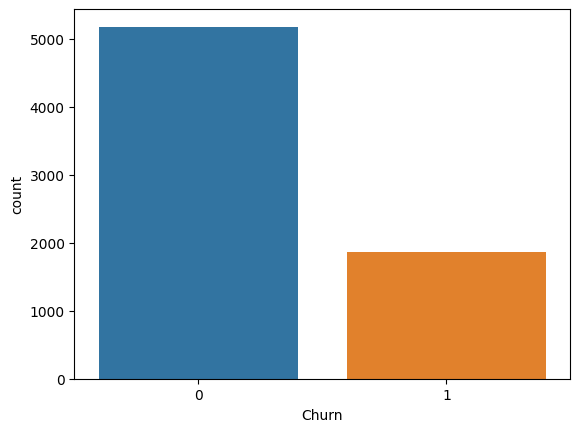

In [75]:
sns.countplot(x='Churn',data=df)

****unbalancing data**

In [76]:
# Separate the target variable and feature variables
X = df.drop('Churn', axis=1)
y = df['Churn']

In [77]:
# Example using SMOTE (consider trying different techniques)
oversample = SMOTE(random_state=42)  # Set random state for reproducibility


In [78]:
X_resampled, y_resampled = oversample.fit_resample(X, y)


In [79]:
from collections import Counter

print("Original class counts:")
print(Counter(y))

print("Oversampled class counts:")
print(Counter(y_resampled))


Original class counts:
Counter({0: 5174, 1: 1869})
Oversampled class counts:
Counter({0: 5174, 1: 5174})


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()

In [82]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## #modeling

# LogisticRegression

In [83]:
lr = LogisticRegression()


In [84]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [85]:

train_prediction = lr.predict(X_train_scaled)
test_prediction = lr.predict(X_test_scaled)

In [86]:
LR_Accuracy_Score = accuracy_score(y_train,train_prediction)
LR_Accuracy_Score

0.8126359023918821

In [87]:
LR_Accuracy_Score = accuracy_score(y_test,test_prediction)
LR_Accuracy_Score

0.8280193236714976

In [88]:
lr_report = classification_report(y_test,test_prediction)
print(lr_report)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [89]:
lr_conf_matrix = confusion_matrix(y_test,test_prediction)
lr_conf_matrix

array([[814, 207],
       [149, 900]])

Text(0.5, 1.0, 'Confusion Matrix')

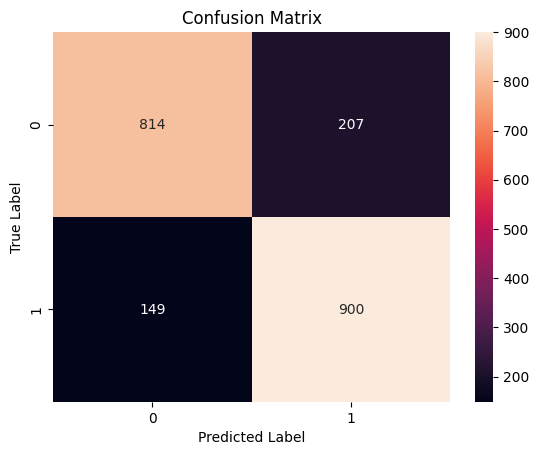

In [90]:
sns.heatmap(lr_conf_matrix,annot=True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# RandomForestClassifier

In [91]:
rf = RandomForestClassifier(n_estimators=100,
    max_depth=5)


In [92]:
train_prediction = rf.fit(X_train_scaled,y_train)
test_prediction = rf.fit(X_test_scaled,y_test)

In [93]:
train_prediction = rf.predict(X_train_scaled)
test_prediction = rf.predict(X_test_scaled)

In [94]:
rf_Accuracy_Score = accuracy_score(y_train,train_prediction)
rf_Accuracy_Score

0.8140855279052911

In [95]:
rf_Accuracy_Score = accuracy_score(y_test,test_prediction)
rf_Accuracy_Score

0.8536231884057971

In [96]:
rf_report = classification_report(y_test,test_prediction)
print(rf_report)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1021
           1       0.82      0.91      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070



In [97]:
rf_conf_matrix = confusion_matrix(y_test,test_prediction)
rf_conf_matrix

array([[810, 211],
       [ 92, 957]])

Text(0.5, 1.0, 'Confusion Matrix')

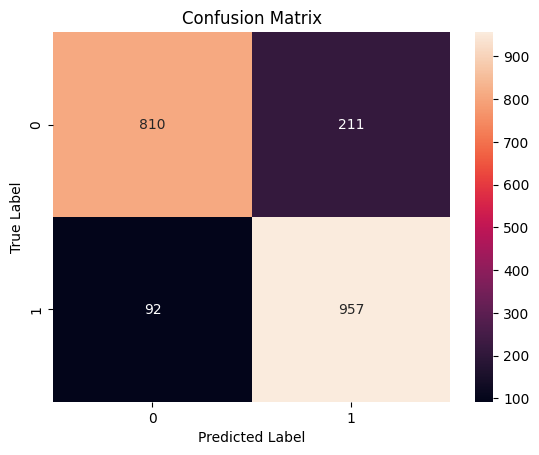

In [98]:
sns.heatmap(rf_conf_matrix,annot=True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# DecisionTreeClassifier

In [99]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)

In [100]:
train_prediction = dt.fit(X_train_scaled,y_train)
test_prediction = dt.fit(X_test_scaled,y_test)

In [101]:
train_prediction = dt.predict(X_train_scaled)
test_prediction = dt.predict(X_test_scaled)

In [102]:
dt_Accuracy_Score = accuracy_score(y_train,train_prediction)
dt_Accuracy_Score

0.7773616815655956

In [103]:
dt_Accuracy_Score = accuracy_score(y_test,test_prediction)
dt_Accuracy_Score

0.7893719806763285

In [104]:
dt_report = classification_report(y_test,test_prediction)
print(dt_report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1021
           1       0.78      0.81      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [105]:
dt_conf_matrix = confusion_matrix(y_test,test_prediction)
dt_conf_matrix

array([[785, 236],
       [200, 849]])

Text(0.5, 1.0, 'Confusion Matrix')

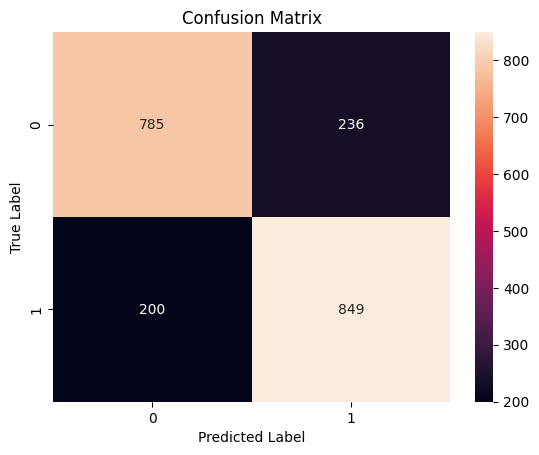

In [106]:
sns.heatmap(dt_conf_matrix,annot=True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

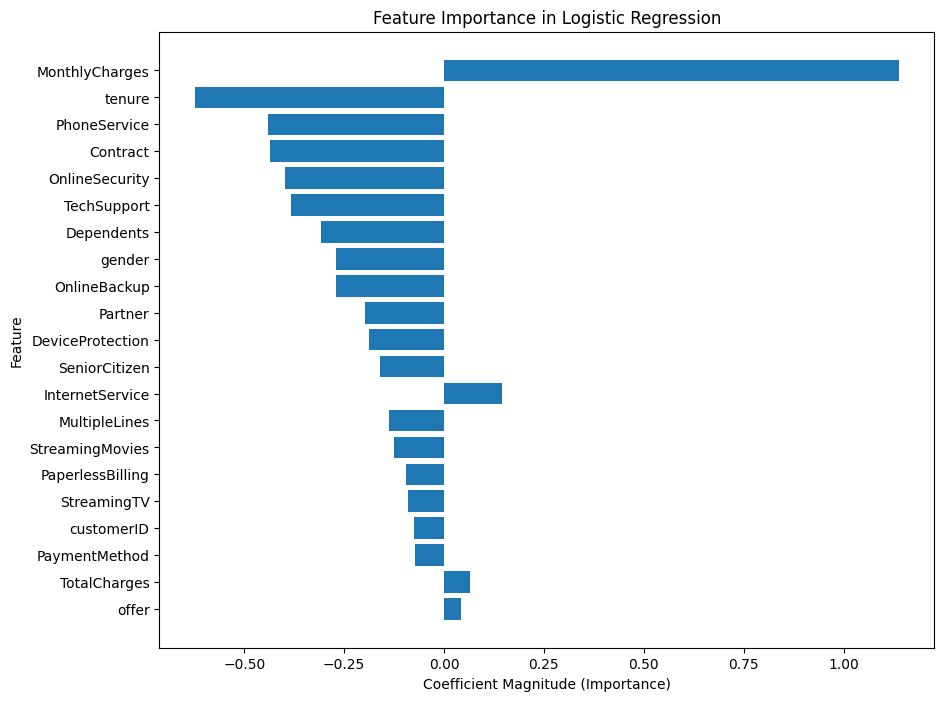

In [107]:
feature_names = X_train.columns  # Assuming the last column is the target variable
coefficients = lr.coef_[0]

# Assuming 'feature_names' contains the names of the features from X_train
# For better visualization, you might want to sort the features by their importance
sorted_idx = np.argsort(np.abs(coefficients))

plt.figure(figsize=(10, 8))
plt.barh(range(len(coefficients)), coefficients[sorted_idx], align='center')
plt.yticks(range(len(coefficients)), np.array(feature_names)[sorted_idx])
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.show()

# the best model is LogisticRegression